## Import

In [ ]:
# !pip uninstall tensorflow

In [ ]:
# !pip install tensorflow==1.13.1

# 1.선형 회귀

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
tf.__version__

'1.13.1'


## 1)Prepare the data

In [ ]:
x_data = datasets.load_boston().data[:, 12] # 12:13으로 열지 않아 행만 존제하는 1차원 리스트로 나옴
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head

<bound method NDFrame.head of         0     1
0    4.98  24.0
1    9.14  21.6
2    4.03  34.7
3    2.94  33.4
4    5.33  36.2
..    ...   ...
501  9.67  22.4
502  9.08  20.6
503  5.64  23.9
504  6.48  22.0
505  7.88  11.9

[506 rows x 2 columns]>

## 2)Build the model

In [ ]:
# reset prarameter theta

w = tf.Variable(tf.random_normal([1])) # 정규분포에서 1개를 랜덤하게 뽑아줌 
b = tf.Variable(tf.random_normal([1])) 

y_predicted = w * x_data + b

## 3)Set the criterion

In [ ]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # Mean Squared Error
optimizer = tf.train.GradientDescentOptimizer(0.001) # vanila Gradient Descent Optimizer // adam, adagrad, momentum ~~~ optimizer
train = optimizer.minimize(loss) # associate loss, optimize, minimize

## 4)Train the model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화

    for step in range(10000):
        sess.run(train) # Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}:'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b])

Step 0: w [0.648565] b [0.43408126]
loss 361.5445251464844:

Step 1000: w [0.3154805] b [13.474753]
loss 145.6599884033203:

Step 2000: w [-0.16759081] b [21.52095]
loss 79.45425415039062:

Step 3000: w [-0.466266] b [26.495785]
loss 54.14537811279297:

Step 4000: w [-0.65093267] b [29.571653]
loss 44.470367431640625:

Step 5000: w [-0.7651097] b [31.473425]
loss 40.77181625366211:

Step 6000: w [-0.8357033] b [32.649254]
loss 39.35795211791992:

Step 7000: w [-0.8793506] b [33.37626]
loss 38.81745529174805:

Step 8000: w [-0.906337] b [33.825756]
loss 38.610836029052734:

Step 9000: w [-0.9230217] b [34.10366]
loss 38.5318489074707:



## 5)Visualize the result

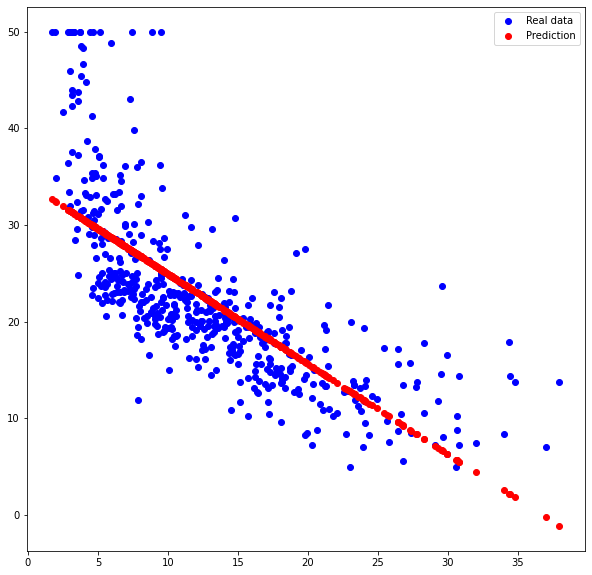

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

# 2.Logistic Regression

## 1)Prepare the data

In [ ]:
x_data = datasets.load_boston().data[:, 12] # 12:13으로 열지 않아 행만 존제하는 1차원 리스트로 나옴
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head

<bound method NDFrame.head of         0     1
0    4.98  24.0
1    9.14  21.6
2    4.03  34.7
3    2.94  33.4
4    5.33  36.2
..    ...   ...
501  9.67  22.4
502  9.08  20.6
503  5.64  23.9
504  6.48  22.0
505  7.88  11.9

[506 rows x 2 columns]>

## 2)Build the model

In [ ]:
_x_data = tf.reshape(x_data, [len(x_data), 1]) # x_data의 열
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2)) # hidden layer
output = tf.matmul(hidden2, W_out) # 정답수에 기반

## 3) Set the criterion

In [ ]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

## 4) Train the model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    output = sess.run(output)

Step 0 || Loss : 1685.3414306640625
Step 5000 || Loss : 27.22722625732422
Step 10000 || Loss : 26.17938232421875
Step 15000 || Loss : 26.154701232910156
Step 20000 || Loss : 26.144332885742188
Step 25000 || Loss : 26.135746002197266
Step 30000 || Loss : 26.12343406677246
Step 35000 || Loss : 26.111530303955078
Step 40000 || Loss : 26.101797103881836
Step 45000 || Loss : 26.09307289123535


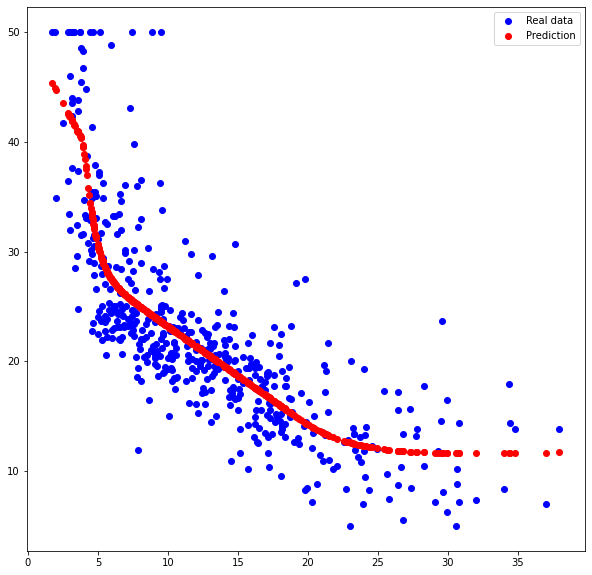

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()